## Background

In the previous assignment, you had computed the values in tensors by hand.

Sample question:

In [2]:
# the model
linear_layer = torch.nn.Linear(5, 2)

# set the parameters (weights, biases)
linear_layer.weight.data = torch.tensor([[1., 2., 3., 4., 5.], [1., 3., 0., 0., 10.]]) # sets the values of weight matrix (W)
linear_layer.bias.data = torch.tensor([3., 1.]) # sets the values of bias vector (b) (note unlike previous assignment, we assign different bias for each output unit)

# data (2 examples each with 5 input features and 2 target values)
inputs = torch.tensor([[100., 10., 20., 15., 1.], [10., 5., 2., 1., 0.]]) # initialize the inputs (X)
targets = torch.tensor([[245., 140.], [30., 30.]]) # initialize the targets (Y)
# forward propagation
model_out = linear_layer(inputs)
print(model_out)
criterion = torch.nn.MSELoss()
loss_out = criterion(model_out, targets)

print("model loss (loss_out):", loss_out.data.item())

tensor([[248., 141.],
        [ 33.,  26.]], grad_fn=<AddmmBackward>)
model loss (loss_out): 8.75


Compute the values in ``loss_out`` by hand. Show your work.

Sample answer: (write it in markdown, not as code. if you don't like markdown, you can write the steps in a piece of paper, take a photo and attach an image in the answer block)

your answer goes here:

First let's compute the $model\_out$ for our inputs:

$XW^T + b  = [[100,10,20,15,1],[10,5,2,1,0]] \times [[1,2,3,4,5],[1,3,0,0,10]]^T  + [[3, 1], [3, 1]]$

$= [[(100*1+10*2+20*3+15*4+1*5+3),(100*1+10*3+20*0+15*0+1*10+1)],[(10*1+5*2+2*3+1*4+0*5+3),(10*1+5*3+2*0+1*0+0*10+1)]] $

$= [[248,141],[33,26]]$

Now let's apply the mean squared error loss to compute $loss\_out$:
$\frac{1}{n}\sum_i^n(\tilde{y_i} -y_i)^2$

$\frac{1}{2}(mean([(248-245),(141-140)]^2) + mean([(33-30),(26-30)]^2) = \frac{1}{2} (\frac{9+1}{2} +\frac{9+16}{2}) = 8.75$


For some questions in this assignment, you will be asked to compute the number of parameters of a model.

Sample question: **How many learnable (or updatable) parameters are present in the above model?**

Sample answer:

linear_layer.weight = $2 \times 5$ = 10

linear_layer.bias = $2 \times 1$ = 2

Thus, the number of parameters is = 10 + 2 = 12

In [3]:
# Python code to get the same result
modules_in_model = [linear_layer]
count = 0
for module in modules_in_model:
  for p in module.parameters():
    print(p.data)
    count += p.numel()
print("the number of parameters:",count)

tensor([[  1.,   2.,   3.,   4.,   5.],
        [  1.,   3.,   0.,   0.,  10.]])
tensor([ 3.,  1.])
the number of parameters: 12


## Exercise 1: More linearities and non-linearities

### 1.1 Logistic Regression (2-class classification)

In [4]:
# the model
linear_layer = torch.nn.Linear(5, 2)

# set the parameters (weights, biases)
linear_layer.weight.data = torch.tensor([[1., 2., 3., 4., 5.], [1., 3., 0., 0., 10.]]) # sets the values of weight matrix (W)
linear_layer.bias.data = torch.tensor([3., 1.]) # sets the values of bias vector (b) (note unlike previous assignment, we assign different bias for each output unit)

# data (2 examples each with 5 input features and 1 target class value)
inputs = torch.tensor([[100., 10., 20., 15., 1.], [10., 5., 2., 1., 0.]]) # initialize the inputs (X)
targets = torch.tensor([0, 1]) # initialize the target classes (Y)

# forward propagation
model_out = linear_layer(inputs)
print(model_out)
softmax_out = nn.LogSoftmax(dim=1)(model_out) # documentation: https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax
print(softmax_out)
nll_loss = nn.NLLLoss() # documentation: https://pytorch.org/docs/stable/nn.html#torch.nn.NLLLoss
loss_out = nll_loss(softmax_out, targets)

print("model loss (loss_out):",loss_out.data.item())

tensor([[248., 141.],
        [ 33.,  26.]], grad_fn=<AddmmBackward>)
tensor([[ 0.0000e+00, -1.0700e+02],
        [-9.1142e-04, -7.0009e+00]], grad_fn=<LogSoftmaxBackward>)
model loss (loss_out): 3.500455617904663


### Compute the values in ``loss_out`` by hand. Show your work. 
(Hint: It might be easier if you compute ``model_out`` first, followed by ``softmax_out`` and then compute ``loss_out``) 



**your answer goes here:**  

input * weight + bias = [[248., 141.],[ 33.,  26.]] 

math.log(math.exp(248)/ (math.exp(248)+math.exp(141))) 

math.log(math.exp(26)/ (math.exp(33)+math.exp(26))) 

softmax_out = [[0.0, -107][-9.1142e-04, -7.0009e+00]]

loss =（0.0+7.0009e+00）/2

### 1.2 Single layer neural network (2-class classification)

In [51]:
# the model
layer_1 = torch.nn.Linear(5, 2) 
activation_fn = nn.ReLU()
layer_2 = torch.nn.Linear(2, 2)

nll_loss = nn.NLLLoss()

# set the parameters (weights, biases)
layer_1.weight.data = torch.tensor([[1., 2., 3., 4., 5.], [1., 3., 0., 0., 10.]]) # sets the values of weight matrix for 1st layer (W_1)
layer_1.bias.data = torch.tensor([3., 1.]) # sets the values of bias vector for 1st layer (b_1)
layer_2.weight.data = torch.tensor([[2., 2.], [1, 1]]) # sets the values of weight matrix for 2nd layer (W_2)
layer_2.bias.data = torch.tensor([2., 1.]) # sets the values of bias vector for 2nd layer (b_2)

# data (2 examples each with 5 features and 1 target class value)
inputs = torch.tensor([[100., 10., 20., 15., 1.], [10., 5., 2., 1., 0.]]) # initialize the inputs (X)
targets = torch.tensor([0, 1]) # initialize the target classes (Y)

# forward propagation
layer1_out = layer_1(inputs)
print("layer1_out:\n",layer1_out)
layer1_hidden = activation_fn(layer1_out)
print("layer1_hidden:\n",layer1_hidden)
layer2_out = layer_2(layer1_hidden)
print("layer2_out:\n",layer2_out)
softmax_out = nn.LogSoftmax(dim=1)(layer2_out)
print("softmax_out:\n",softmax_out)
loss_out = nll_loss(softmax_out, targets)

print("model loss (loss_out):", loss_out.data.item())

layer1_out:
 tensor([[248., 141.],
        [ 33.,  26.]], grad_fn=<AddmmBackward>)
layer1_hidden:
 tensor([[248., 141.],
        [ 33.,  26.]], grad_fn=<ReluBackward0>)
layer2_out:
 tensor([[780., 390.],
        [120.,  60.]], grad_fn=<AddmmBackward>)
softmax_out:
 tensor([[   0., -390.],
        [   0.,  -60.]], grad_fn=<LogSoftmaxBackward>)
model loss (loss_out): 30.0


### Compute the values in ``loss_out`` by hand. Show your work. 
(Hint: It might be easier if you compute ``layer1_out`` first, followed by ``layer1_hidden`` and the rest  ``layer2_out``, ``softmax_out``, ``loss_out`` in order.) 



**your answer goes here:**

math.log(math.exp(780)/ (math.exp(780)+math.exp(390))) = 0.0

math.log(math.exp(390)/ (math.exp(780)+math.exp(390))) = -390

math.log(math.exp(120)/ (math.exp(120)+math.exp(60))) = 0

math.log(math.exp(60)/ (math.exp(120)+math.exp(60))) = -60

(0.0+60)/2 = 30

### 1.3 Multi layer neural network (2-class classification)

In [66]:
# the model
layer_1 = torch.nn.Linear(5, 4)
activation_fn = nn.ReLU()
layer_2 = torch.nn.Linear(4, 3)
layer_3 = torch.nn.Linear(3, 2)
softmax_out = nn.LogSoftmax(dim=1)(model_out)
nll_loss = nn.NLLLoss()

# set the parameters (weights, biases)
layer_1.weight.data = torch.tensor([[1., 2., 3., 4., 5.], [1., 3., 0., 0., 10.], [1., 0., 0., 4., 5.], [1., 3., 1., 0., 0.]]) # sets the values of weight matrix for 1st layer (W_1)
layer_1.bias.data = torch.tensor([3., 1., 1., 0.]) # sets the values of bias vector for 1st layer (b_1)
layer_2.weight.data = torch.tensor([[2., 2., 2., 2.], [1., 1., 1., 1.], [0., 1., 1., 0.]]) # sets the values of weight matrix for 2nd layer (W_2)
layer_2.bias.data = torch.tensor([2., 1., 0.]) # sets the values of bias vector for 2nd layer (b_2)
layer_3.weight.data = torch.tensor([[2., 1., 2.], [1., 1., 0.]]) # sets the values of weight matrix for 3rd layer (W_3)
layer_3.bias.data = torch.tensor([1., 0.]) # sets the values of bias vector for 3rd layer (b_3)

# data (2 examples each with 5 features and 1 target class value)
inputs = torch.tensor([[100., 10., 20., 15., 1.], [10., 5., 2., 1., 0.]]) # initialize the inputs (X)
targets = torch.tensor([0, 1]) # initialize the target classes (Y)

# forward propagation
layer1_out = layer_1(inputs)
print("layer1_out:\n",layer1_out)
layer1_hidden = activation_fn(layer1_out)
print("layer1_hidden:\n",layer1_hidden)
layer2_out = layer_2(layer1_hidden)
print("layer2_out:\n", layer2_out)
layer2_hidden = activation_fn(layer2_out)
print("layer2_hidden:\n",layer2_hidden)
layer3_out = layer_3(layer2_hidden)
print("layer3_out:\n",layer3_out)
softmax_out = nn.LogSoftmax(dim=1)(layer3_out)
print("softmax_out:\n",softmax_out)
loss_out = nll_loss(softmax_out, targets)

print("model loss (loss_out):", loss_out.data.item())

layer1_out:
 tensor([[248., 141., 166., 150.],
        [ 33.,  26.,  15.,  27.]], grad_fn=<AddmmBackward>)
layer1_hidden:
 tensor([[248., 141., 166., 150.],
        [ 33.,  26.,  15.,  27.]], grad_fn=<ReluBackward0>)
layer2_out:
 tensor([[1412.,  706.,  307.],
        [ 204.,  102.,   41.]], grad_fn=<AddmmBackward>)
layer2_hidden:
 tensor([[1412.,  706.,  307.],
        [ 204.,  102.,   41.]], grad_fn=<ReluBackward0>)
layer3_out:
 tensor([[4145., 2118.],
        [ 593.,  306.]], grad_fn=<AddmmBackward>)
softmax_out:
 tensor([[    0., -2027.],
        [    0.,  -287.]], grad_fn=<LogSoftmaxBackward>)
model loss (loss_out): 143.5


(0.0+287) = 143.5

### Compute the values in **loss_out** by hand. Show your work.
(Hint: It might be easier if you compute ``layer1_out`` first, followed by ``layer1_hidden`` and the rest  ``layer2_out``, ``layer2_hidden``, ``layer3_out``, ``softmax_out``, ``loss_out`` in order.) 



**your answer goes here:**



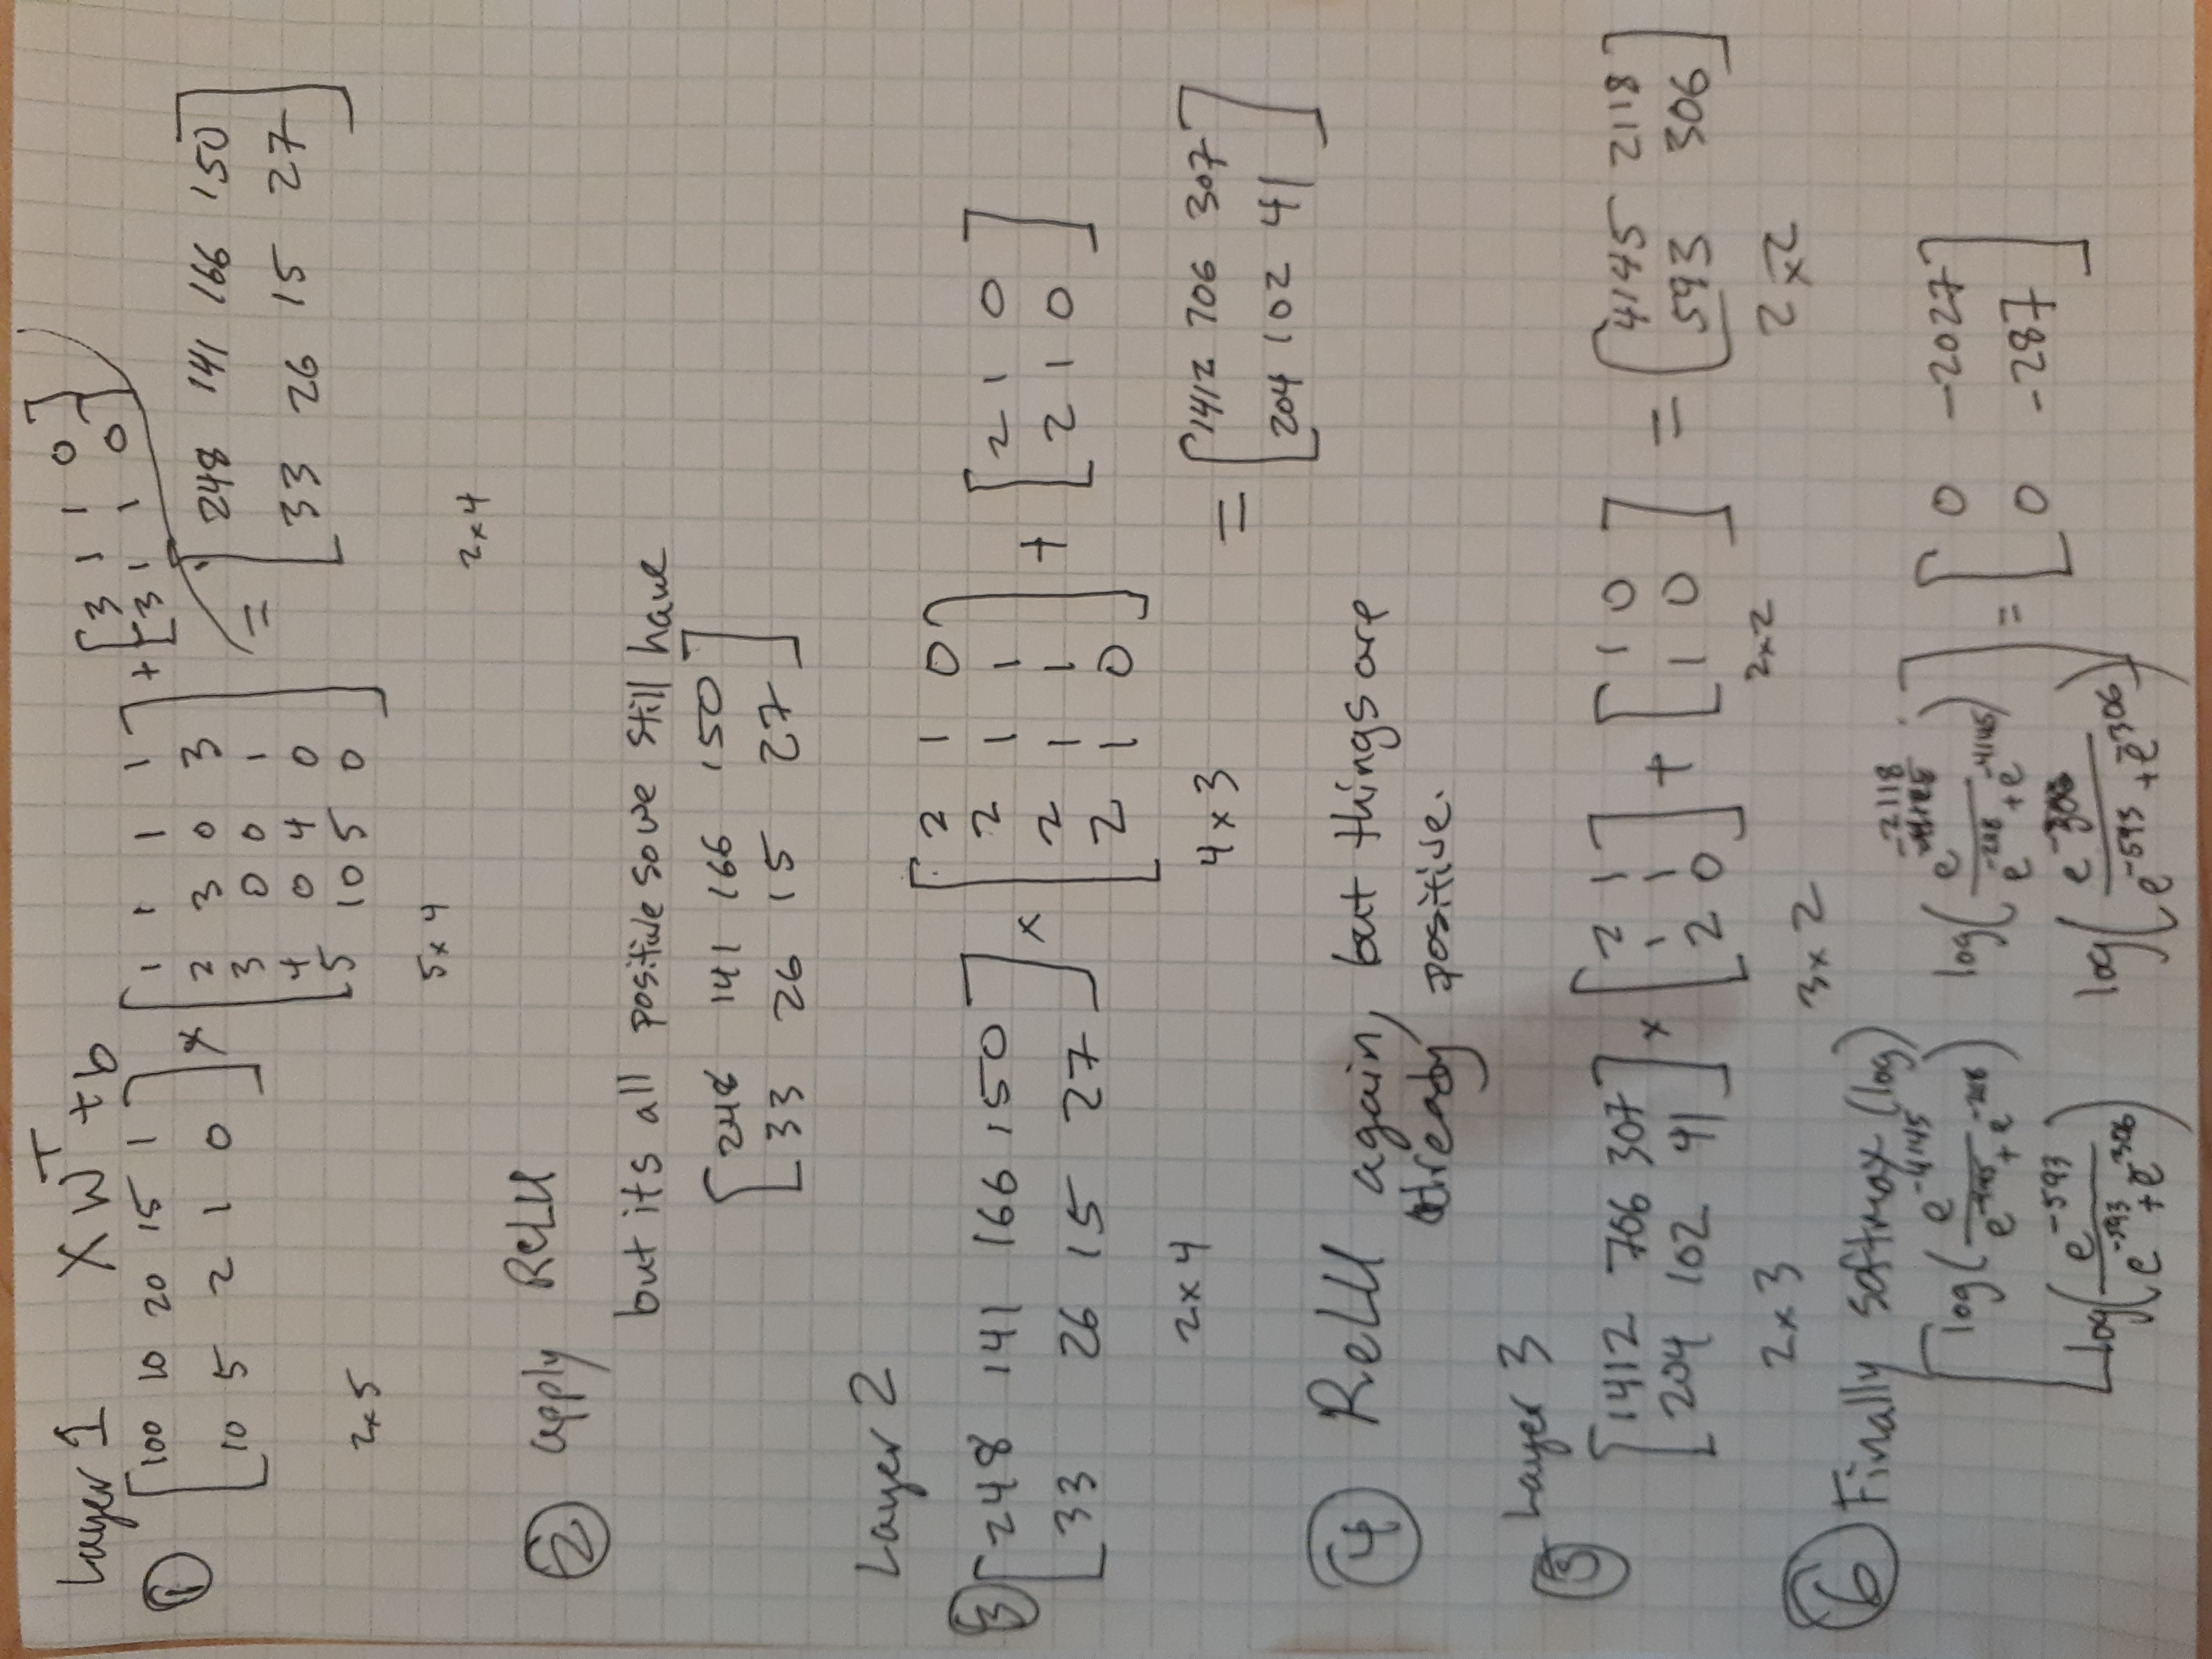

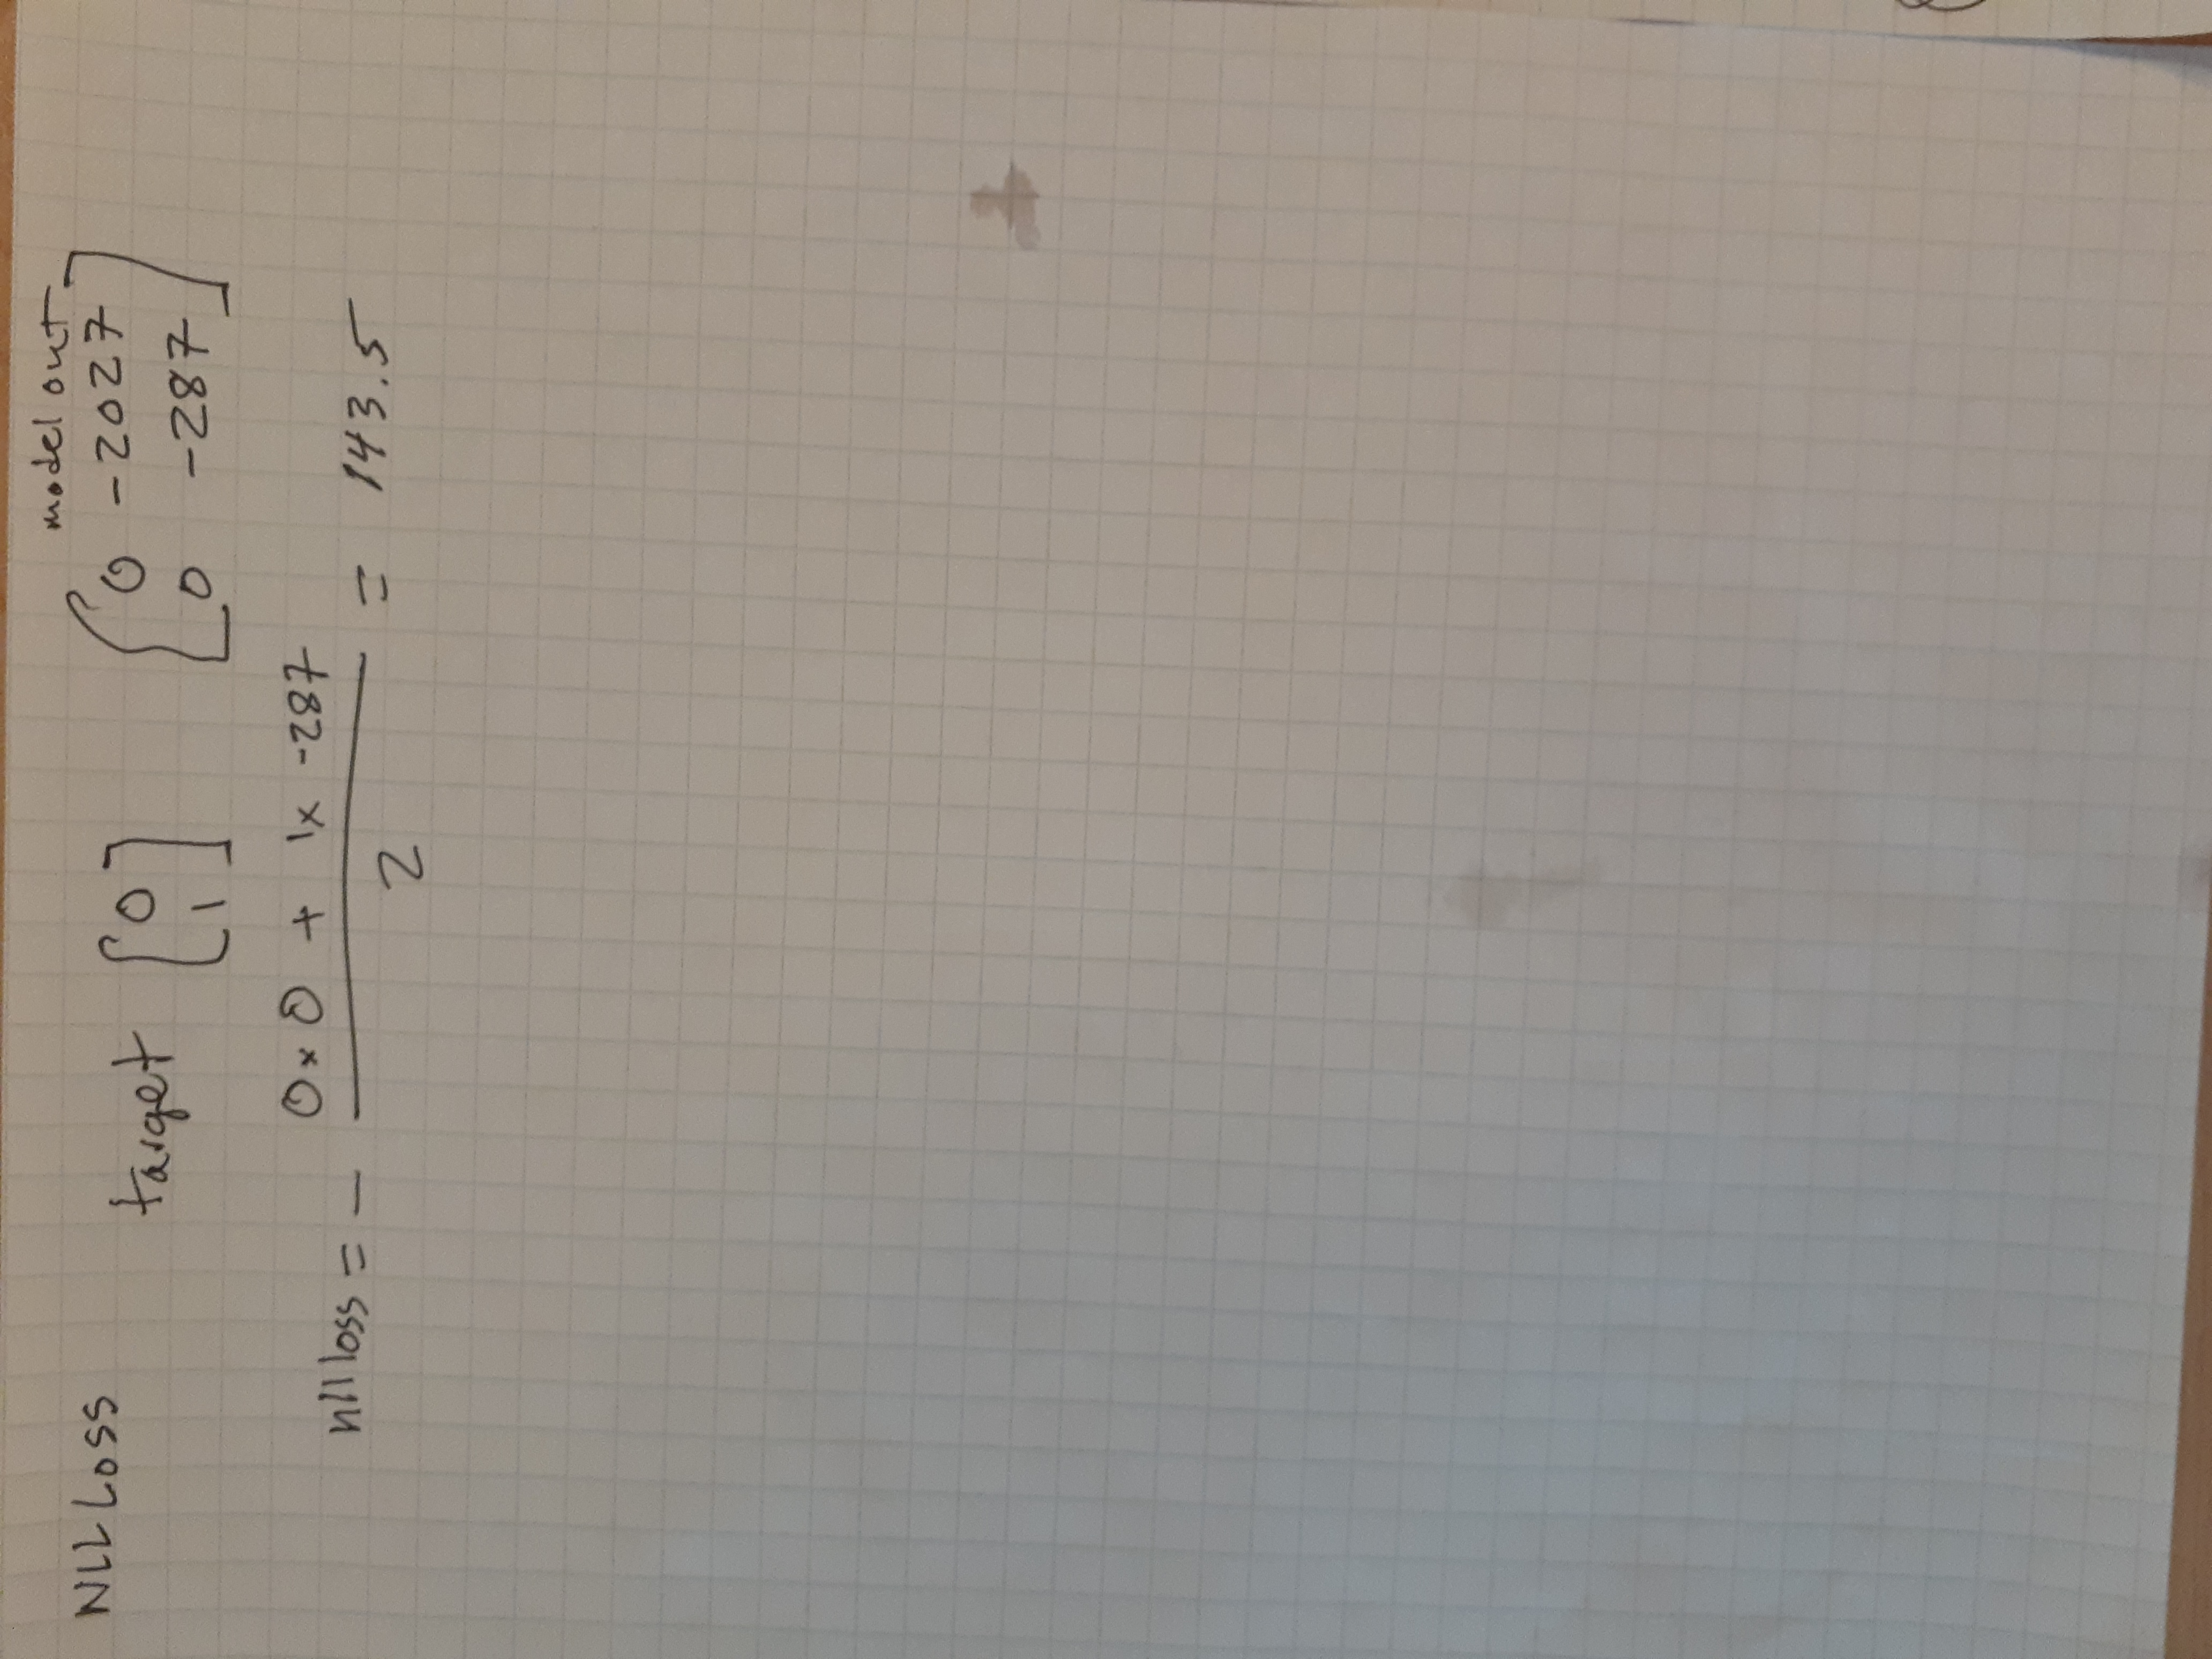
